# ESDA2 Group Project Sheet 2

In Sheet 1, we looked at Greenland glacier advance and retreat. In this notebook we will turn to possible reasons *why* these changes occurred.

## Load required libraries

Load the same 5 libraries (numpy, pandas, pyplot, os and basemap) as in the first group project sheet, using the same aliases.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Meteorological data from Greenland

![A weather station in Greenland](pic_metstation.png)

Meteorological data for Greenland is freely available from the Danish Meteorological Institute. The data are separated into a single csv file for each meteorological station and they are described in the file 'DMIRep24-08.pdf'. The spreadsheet station_details.xlsx contains an overview of the location, elevation and operational duration for each of the stations. We have downloaded these files and placed them into the shared data directory for you - take a quick look at them using a pdf and spreadsheet viewer. When you try to read these data in the rest of this notebook, remember to use the correct file path.

### Fundamentals: Understanding the data

Just like for the glacier data, we'll start by getting and basic understanding of the data and checking it looks right once we've loaded it into python.

Do the following:
1. Read the *station_details.xlsx* file into python as a pandas dataframe called *stations*, print it to the screen and check that you understand the output.
2. Create a map of Greenland and add the location of the stations to the map (this is similar to the glacier locations plot from Sheet 1 if you need help).
3. Add the station numbers to the map so that you can see which station is where. You can do this in a few different ways:
    - Manually add text labels to your existing map using
    
    ```plt.text(stations['Longitude'][i], stations['Latitude'][i], stations['Station number'][i])```
    - Or, you can add a legend to your location markers using `plt.legend()` and
    
    ```plt.plot(stations['Longitude'][i], stations['Latitude'][i], label=stations['Station number'][i])```

(And in each case looping over the stations using i).

How long are the time series and where are the met stations located? Do we have good coverage or are there regions or time periods that are not well covered?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Now we want to read the meterological data. Pick one of the stations and open the corresponding csv file in a spreadsheet viewer. How is the data formatted? Can you make sense of the different numbers? What is the temporal resolution of the data?


We'll now read in the data step by step. First read the data for your chosen station into a pandas dataframe called *metdata* using `pd.read_csv`. Note that you will need to use the options `delimiter=';'` and `na_values=''`. Check it looks sensible using `.head()`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

You will see that the column names are numerical codes. Rename the columns that you would like to use with more sensible names using
```
metdata = metdata.rename(columns={'old_name':'new_name'})
```
You can find what the codes mean in 'DMIRep24-08.pdf'. For example, '101' corresponds to air temperature, so call it 'airtemp'. Check this has worked. What are the units of the air temperature?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Now we need to make sure the times are in a format that pandas understands. To do so, run the following, checking that you understand what each line does.

In [ ]:
# rename Hour(utc) to the standard name Hour
metdata = metdata.rename(columns={'Hour(utc)':'Hour'})
# make a column called Date which has a pandas timestamp based on Year, Month, Day and Hour
metdata['Date'] = pd.to_datetime(metdata[['Year', 'Month', 'Day', 'Hour']])
# set the dataframe index to be Date
metdata.set_index('Date', inplace=True)
# print out to check
metdata.head()

Now make a plot of the air temperature versus time for your chosen station. Label the axes and give the plot an appropriate title.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Does this look sensible? For example, are the air temperature values as you would expect for Greenland? Is the temporal range of the data as you expected from your answers above? If not, check your code is correct.

What sort of variability do you see? That is, how does the air temperature change in time? Is there a change over the full time period? Is there a change within a year or within a day? Note that you can zoom into a particular date range on the plot using e.g.,
```
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'))
```


### Core: Analysis of air temperatures

We are interested in using the air temperature data to understand why glaciers in Greenland have changed in recent decades. What sort of information do you therefore think we need from the air temperatures and what sort of analysis can we do to get this information?


#### Spatial patterns of air temperature

First, we could ask how the air temperature varies from station to station.
1. Read in the air temperature for each station, and calculate the mean and the standard deviation of the temperature.
2. Create a map plot with markers showing the mean air temperature at each station, and another map showing the standard deviation.

Do you see any differences between the south and north of Greenland in the mean air temperature and the variability in the air temperature? What do you think this might mean for the glaciers?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


#### Temporal patterns in air temperature

You will hopefully have seen in your plots above that the air temperature varies dramatically throughout a single year, which can make it difficult to see if there are longer-term trends. We will work with time series data much more later in the course, but for now we will show you one technique for picking out longer term trends in time series data.

**Using the meteorological station 432000**, read in the air temperature data, rename the columns appropriately, create a pandas timestamp column and set it to be the index of the dataframe (that is, follow the steps in the fundamentals section above). Call your dataframe *metdata*. As always, print your dataframe to the screen to check it looks correct.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

We can 'resample' this data by taking averages over various time periods. For example, we can calculate annual mean temperatures as follows
```
annualT = metdata['airtemp'].resample('YE').mean()
```
This creates a new dataframe called *annualT* which contains only the annual mean air temperatures (the 'YE' indicates yearly resampling; other time periods are possible too). Resample your data to annual and then plot the annual mean air temperatures.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

What trends do you see in your plot? Are there any particularly warm or cold years? Do you trust these data?


### Core: BEWARE

These meteorological datasets often have gaps where the station wasn't working or was turned off for maintenance. This can lead to problems when you calculate the annual mean temperatures. For example, if a station was turned off during the winter, but turned on during the summer, then when we take an annual mean temperature we will get a mean summer temperature that will look a lot warmer than the other years. Similarly, if a station was working during the winter but not during the summer, then the annual mean temperature for that year will look a lot colder than the other years. If you have big warm or cold spikes in your annual mean time series in your plot above, these may not be real.

To avoid this issue, we want to leave out any annual means when there is not enough data to calculate a representative annual mean. We can do this as follows

In [ ]:
# remove any rows with NaNs in airtemp
metdata = metdata[~metdata['airtemp'].isna()]
# calculate how many months per year we have actual data from
months_per_year = metdata.groupby('Year')['Month'].nunique()
# find the years for which we have data in every month of the year
valid_years = months_per_year[months_per_year == 12].index
# remove data from years which do not have data in every month
metdata_robust = metdata[metdata['Year'].isin(valid_years)]

Run the cell above and now recalculate and replot the annual mean air temperature using *metdata_robust*. Do you notice any differences compared to your previous annual mean plot?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

With the robust annual mean time series, do you notice any long term trends in air temperatures? Has the air temperature warmed or cooled? Are there periods of stability and periods of change? Are there any particularly warm or cool years?


This information is the sort you could include in the results section of your report when you show and describe a figure.

### Core: Put air temperature and glacier area records together

We now have the pieces to plot glacier area and air temperature time series together to see if there is any relationship. Follow these steps:
1. Obtain the glacier area time series for a glacier of your choice (see Group Project Sheet 1).
2. Use the location of the glacier and the locations of the meteorological stations to find a station near the glacier (it may help to make a plot).
3. Obtain the air temperature record from the station and calculate robust annual mean air temperature.
3. Plot the time series of glacier area and air temperature on subplots that share a common time axis with the following code as a starting point
```
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
axs[0].plt( *plot glacier area* )
axs[1].plt( *plot annual air temperature* )
```

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Do you see any relationship here? Is there anything in the air temperature record that might have caused the glacier area to change? Try a few different glaciers in different areas of the ice sheet.


### [Advanced]: Glacier-air temperature correlation plots

One way of making comparisons between two variables (e.g., glacier area and air temperature) more quantitative is to try to correlate the two variables. To do this, try the following:

1. Obtain glacier area and air temperature time series as above.
2. Bring both time series onto the same time axis. That is, if we're going to plot air temperature and glacier area against each other, we need to make sure we are comparing them at the same point in time. It is easiest to do this by creating a new pandas series for the individual glacier area, then resampling this to annual means, then combining it with the annual air temperature.
3. Plot a scatter plot of the glacier area on the y-axis and the air temperature on the x-axis and fit a trend line.
4. Do your results change if each data point represents a 5-year average instead of a 1-year average?

What can you now say about the relationship between glacier area and air temperature? Is there a simple relationship? Is there a lot of scatter? If there is a relationship, how much glacier area is lost for each degree of warming?


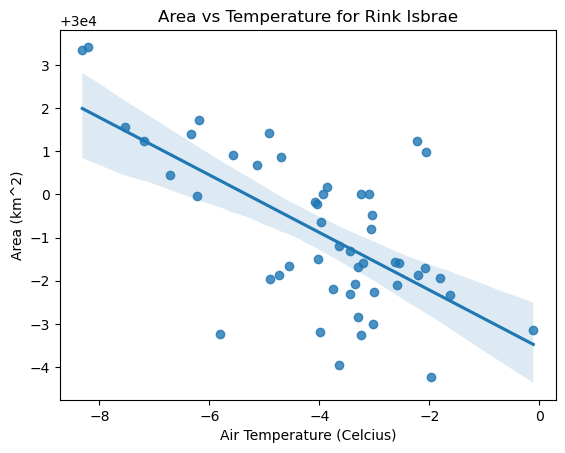

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

# choose station, glacier, and sampling timeframe
# rink isbrae: lon=-51.663166, lat=71.732830 --> station 422100: long=-51.066111, lat=69.240278
glacier = 'Rink Isbrae'
station = '422100'
sample_time = 'YE'

# import data
shared_data_dir = os.environ["SHARED_DATA_DIR"]
filename = '/ESDA2_GroupProject_Data/glacier_area.xlsx'
path = shared_data_dir + filename 
glacier_df = pd.read_excel(path)

filename = f'/ESDA2_GroupProject_Data/{station}.csv'
path = shared_data_dir + filename
station_df = pd.read_csv(path, delimiter=';', na_values='')

# clean area data to a series
glacier_df = glacier_df.drop(columns=['Longitude', 'Latitude'])
glacier_df = glacier_df.set_index('Glacier')
glacier_df = glacier_df.T
area_series = glacier_df[glacier]
area_series.index = pd.to_datetime(area_series.index)

# clean temp data to a series
station_df = station_df.rename(columns={'Hour(utc)':'Hour', '101':'airtemp'})
station_df = station_df[['Year', 'Month', 'Day', 'Hour', 'airtemp']]
station_df = station_df[~station_df['airtemp'].isna()]
months_per_year = station_df.groupby('Year')['Month'].nunique()
valid_years = months_per_year[months_per_year == 12].index
station_df = station_df[station_df['Year'].isin(valid_years)]
station_df['Date'] = pd.to_datetime(station_df[['Year', 'Month', 'Day', 'Hour']])
station_df = station_df.set_index('Date')
station_series = station_df['airtemp']

# find later starting date
start = max(area_series.index[0], station_series.index[0])

# trim series to same time frame
temp_series = station_series[station_series.index >= start]
area_series = area_series[area_series.index >= start]

# resmaple series
temp_series = temp_series.resample(sample_time).mean().dropna()
area_series = area_series.resample(sample_time).mean().dropna()

# join series into dataframe
temp_area_df = pd.concat([temp_series, area_series], axis=1, join='inner')
temp_area_df.columns = ['temp', 'area']

# create plot
sns.regplot(x='temp', y='area', data=temp_area_df)
plt.xlabel('Air Temperature (Celcius)')
plt.ylabel('Area (km^2)')
plt.title(f'Area vs Temperature for {glacier}')
plt.show()